# Práctica de Probabilidad y Estadística I

## Ciencia de Datos e Inteligencia Artificial

Joaquin Negrete, Oliver Anderson, Makar Isaev, y Wenjie Shan


In [16]:
# Load data
load("./pelis1999.1.RData")
data <- pelis1999.1
head(data)

# Download skewness library
install.packages("e1071")
library(e1071)


,title,length,budget,rating
,<chr>,<int>,<int>,<dbl>
1,10 Things I Hate About You,97,16000000,6.7
2,"13th Warrior, The",102,85000000,6.1
3,200 Cigarettes,101,6000000,5.4
4,"24 Hour Woman, The",93,2500000,5.6
5,8MM,123,40000000,5.9
6,ABCD,105,200000,5.4


Installing package into 'C:/Users/joaqu/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



also installing the dependency 'proxy'




package 'proxy' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\joaqu\AppData\Local\Temp\Rtmp6LWP4u\downloaded_packages


## Análisis Descriptivo Multivariante

### 1.a)


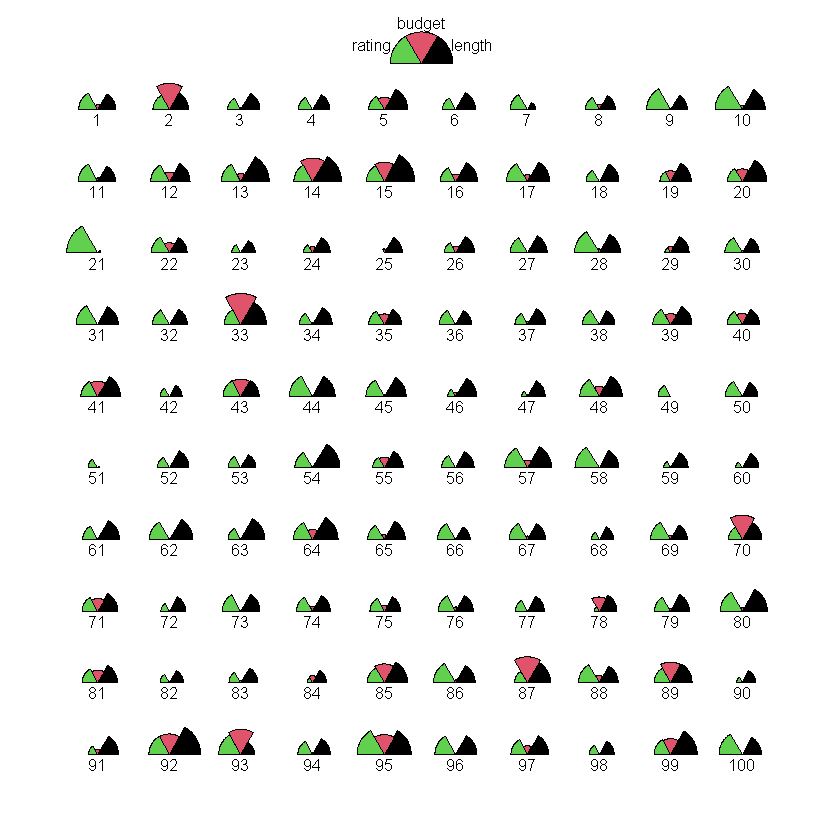

In [3]:
stars(
  data[, c(2:4)],
  key.loc = c(12.7, 24.5),
  draw.segments = TRUE,
  full = FALSE,
)


Lo primero a ver es que el length y rating no parecen tener una relación, ya que existen películas con un rating muy alto y length muy bajo, como la 21, Atrapados; y hay otras como la como la 91, Eye of the Beholder, que pasa al revés. En el resto de películas el rating y length no parecen tener una relación clara.
También se puede ver que el budget en casi todas las películas es muy bajo, y que el rating es muy variable, lo que indica que el rating no depende del presupuesto de la película.

Es curioso ver películas con un rating muy alto y un presupuesto muy bajo, como, nuevamente, Atrapados.
Otras películas como la 51, Chage of Climate, A, tienen todos los valores muy bajos.

Finalmente, películas como las 44, 45, 57 y 58 tienen un nivel parecido de rating, length y budget, lo que indica que podrían ser del mismo género o tener algo en común.


In [4]:
data[c(21, 91, 51, 44, 45, 57, 58), ]


,title,length,budget,rating
,<chr>,<int>,<int>,<dbl>
21,Atrapados,26,3500,9.4
91,Eye of the Beholder,109,15000000,4.5
51,"Change of Climate, A",19,15000,4.6
44,Boys Don't Cry,118,2000000,7.6
45,Bravo Two Zero,115,6500000,6.5
57,"Cider House Rules, The",126,24000000,7.5
58,"Clown in Babylon, A",105,150000,7.8


### 1.b)


Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"


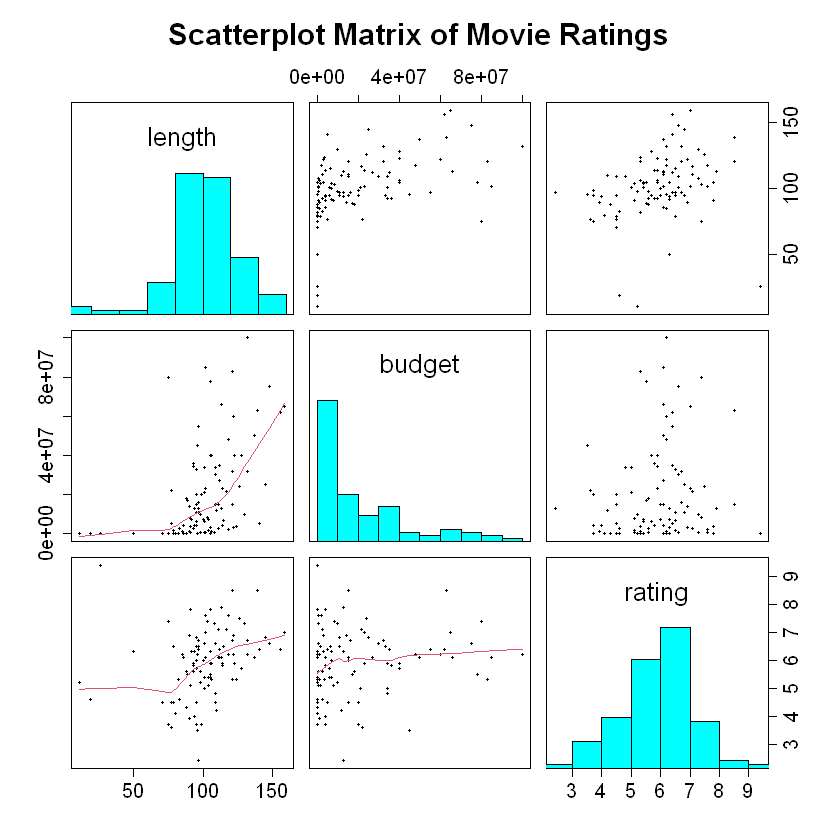

In [5]:
panel.hist <- function(x, ...) {
  usr <- par("usr")
  on.exit(par(usr))
  par(usr = c(usr[1:2], 0, 1.5))
  h <- hist(x, plot = FALSE)
  breaks <- h$breaks
  nB <- length(breaks)
  y <- h$counts
  y <- y / max(y)
  rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
}

# Scatterplot matrix
pairs(
  data[, c(2:4)],
  pch = 19,
  cex = 0.5,
  lower.panel = panel.smooth,
  main = "Scatterplot Matrix of Movie Ratings",
  cex.main = 1.5,
  cex.axis = 1.5,
  cex.lab = 1.5,
  diag.panel = panel.hist,
)


Se puede ver que en length vs budget hay una especie de gráfica logarítmica, mientras que en budget vs length hay una gráfica exponencial.
Luego, en length vs rating solo parece haber una nube de puntos, no hay una línea. Y en rating vs length R si dibuja una línea, pero no es una línea recta.
Finalmente, en budget vs rating hay una nube de puntos que parece una campana de Gauss.

Ahora voy a analizar la correlación entre las variables.

### 1.c)


In [6]:
# Correlation matrix
cor(data[, c(2:4)])


,length,budget,rating
length,1.0000000,0.4540243,0.2673303
budget,0.4540243,1.0000000,0.1357281
rating,0.2673303,0.1357281,1.0000000


Se ve que el par de variables con mayor coeficiente de correlación es budget y length, lo cual tiene sentido porque a mayor longitud de película, mayor tiene que ser el presupuesto. Sin embargo, es una correlación débil, ya que lo contrario no sucede. Puede haber películas con un presupuesto muy alto y una longitud muy baja.
Luego, el par de variables con menor coeficiente de correlación es budget y rating, lo cual también tiene sentido, ya que el presupuesto de la película no tiene por qué estar relacionada con el rating. Lo mismo pasa con la longitud de la película.


## Análisis descriptivo de una variable unidimensional. Rating.

### 2.a)


In [7]:
summary(data$rating)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.40    5.20    6.10    5.91    6.60    9.40 

Tenemos una muestra de 100 datos, por lo tanto, para la fórmula de Sturges, consideramos

$$M = 100$$

Y por tanto, tenemos que

$$c = 1 + log_2(100) \approx 7.6439$$

Así que por ser impar, redondeamos a la baja, 7, y tenemos 7 intervalos.


In [8]:
data_cut <- cut(data$rating, breaks = 7)
table(data_cut)

# Get the max rating value
max_rating <- max(data$rating)
max_rating


data_cut
(2.39,3.4]  (3.4,4.4]  (4.4,5.4]  (5.4,6.4]  (6.4,7.4]  (7.4,8.4] (8.4,9.41] 
         1         10         22         36         22          6          3 

[1] 9.4

Como los intervalos son muy irregulares, vamos a tomar los intervalos

$$[0, 1.25), [1.25, 2.5), [2.5, 3.75), [3.75, 5), [5, 6.25), [6.25, 7.5), [7.5, 8.75), [8.75, 10)$$

Donde los intervalos significan lo siguiente:
Pésimo - Extremadamente mala - Muy mala - Mala - Regular - Buena - Muy buena - Excelente

Podemos no incluir el 10 porque el máximo es un 9.4


In [9]:
data_cut <- cut(data$rating, breaks = c(0, 1.25, 2.5, 3.75, 5, 6.25, 7.5, 8.75, 10), right = FALSE)
table(data_cut)


data_cut
  [0,1.25) [1.25,2.5) [2.5,3.75)   [3.75,5)   [5,6.25) [6.25,7.5) [7.5,8.75) 
         0          1          5         13         42         30          8 
 [8.75,10) 
         1 

Ahora que podemos ver mejor los datos, construimos la tabla de frecuencias.


In [10]:
table <- cbind(
  n_i = table(data_cut),
  N_i = cumsum(table(data_cut)),
  f_i = table(data_cut) / length(data$rating),
  F_i = cumsum(table(data_cut)) / length(data$rating)
)

table

n <- length(data$rating)

Q_1 <- (n + 1) * 0.25
Q_2 <- (n + 1) * 0.5
Q_3 <- (n + 1) * 0.75

# Make a table with the quantiles
quantiles <- cbind(
  Q_i = c(Q_1, Q_2, Q_3),
  quantile(data$rating, c(0.25, 0.5, 0.75))
)
quantiles


,n_i,N_i,f_i,F_i
"[0,1.25)",0,0,0.00,0.00
"[1.25,2.5)",1,1,0.01,0.01
"[2.5,3.75)",5,6,0.05,0.06
"[3.75,5)",13,19,0.13,0.19
"[5,6.25)",42,61,0.42,0.61
"[6.25,7.5)",30,91,0.30,0.91
"[7.5,8.75)",8,99,0.08,0.99
"[8.75,10)",1,100,0.01,1.00


,Q_i,
25%,25.25,5.2
50%,50.50,6.1
75%,75.75,6.6


Claramente, la clase con menor frecuencia es la [0, 1.25) con 0 datos. La que tiene mayor frecuencia, la clase modal, es [5, 6.25), con 42 datos.
Los cuantiles están representados en la tabla, siendo el Q1 = 5.2, Q2 (mediana) = 6.1, y Q3 = 6.6.

### 2.b)

La clase modal, como dijimos antes es [5, 6.25).
Ahora haremos el histograma para identificar huecos, clases separadas, y simetría/asimetría.


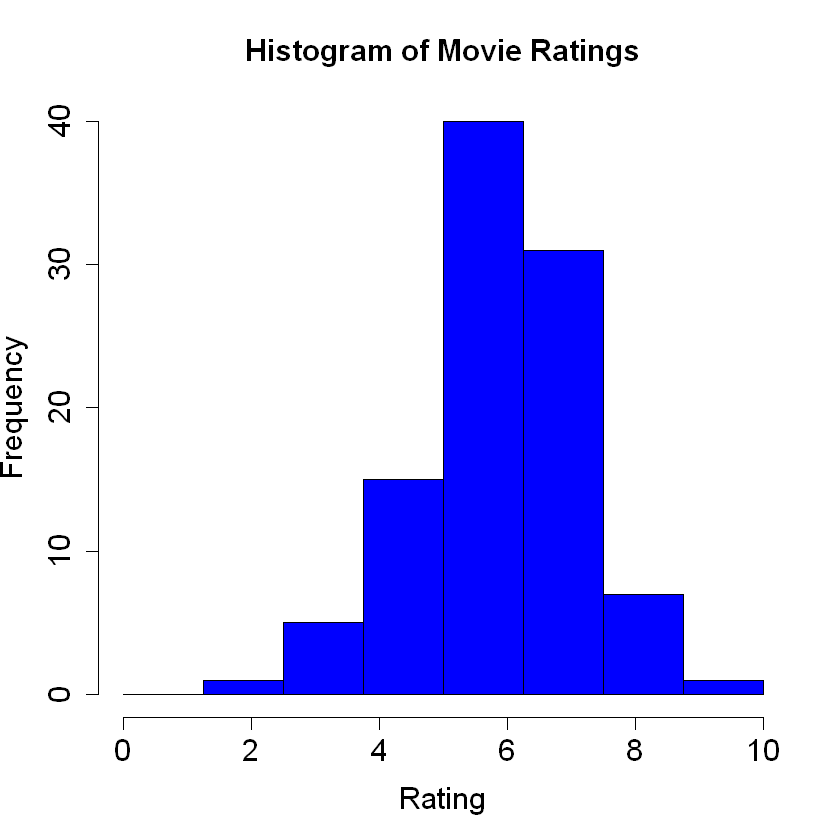

In [12]:
# Make rating histogram
hist(
  data$rating,
  breaks = c(0, 1.25, 2.5, 3.75, 5, 6.25, 7.5, 8.75, 10),
  col = "blue",
  xlab = "Rating",
  ylab = "Frequency",
  main = "Histogram of Movie Ratings",
  cex.main = 1.5,
  cex.axis = 1.5,
  cex.lab = 1.5
)


Observamos que existe un hueco en el primer intervalo, aunque no separa dos clases. Respecto a las clases separadas que no se presenta ninguna. Y pareciera que es ligeramente asimétrico hacia la izquierda, pero para asegurarnos, calculamos el coeficiente de asimetría.


In [20]:
sk <- skewness(data$rating)
kur <- kurtosis(data$rating)

# Print the skewness and kurtosis
sk
kur
median(data$rating)


[1] -0.1097658

[1] 0.2493868

[1] 6.1

Vemos que el coeficiente de asimetría es ligeramente negativo, por lo que confirmamos lo anterior. Esto nos dice que las películas tienden a tener una rating mayor a 5, pero no mucho mayor.
Por otro lado vemos el coeficiente de curtosis es superior a 0, por tanto, consideramos que la distribución es leptocúrtica, es decir, tiene una mayor concentración de datos en torno a la media, que es 6.1.

### 2.c) Diagrama de tallo y hojas


In [18]:
stem(data$rating)



  The decimal point is at the |

  2 | 4
  3 | 567779
  4 | 012355555668
  5 | 0011122333344455666778899999
  6 | 001111111222223333444455556667778899
  7 | 00113344566889
  8 | 55
  9 | 4



Vemos que como confirmaba la curtosis, la distribución es leptocúrtica, ya que la mayoría de los datos se concentran en torno a la media, el 6, y ahí también está la moda. Podemos ver otra versión del diagrama con más clases.


In [21]:
stem(data$rating, scale = 2)



  The decimal point is at the |

  2 | 4
  2 | 
  3 | 
  3 | 567779
  4 | 0123
  4 | 55555668
  5 | 00111223333444
  5 | 55666778899999
  6 | 0011111112222233334444
  6 | 55556667778899
  7 | 00113344
  7 | 566889
  8 | 
  8 | 55
  9 | 4



Ahora se aprecia mejor la distribución de los datos, y se ve mejor la simetría ligeramente a la izquierda de los datos.

Para hallar los datos atípicos que presenta este diagrama, vamos a utilizar el criterio para detectar datos atípicos basados en el rango intercuartílico.

#### Datos atípicos leves


In [30]:
Q_1 <- 5.2
Q_3 <- 6.6
RI <- Q_3 - Q_1

# Default outliers
data$rating[which(data$rating < (Q_1 - 1.5 * RI) | data$rating > (Q_3 + 1.5 * RI))]

# Excess outliers
data$rating[which(data$rating > (Q_3 + 3 * RI))]


[1] 9.4 2.4

numeric(0)

Se puede ver que hay dos datos atípicos leves, que son el 9.4 y el 2.4, y no hay datos atípicos extremos. Por lo que podemos considerar que los datos están bien distribuidos, y la media es representativa de la distribución de los datos.
